In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

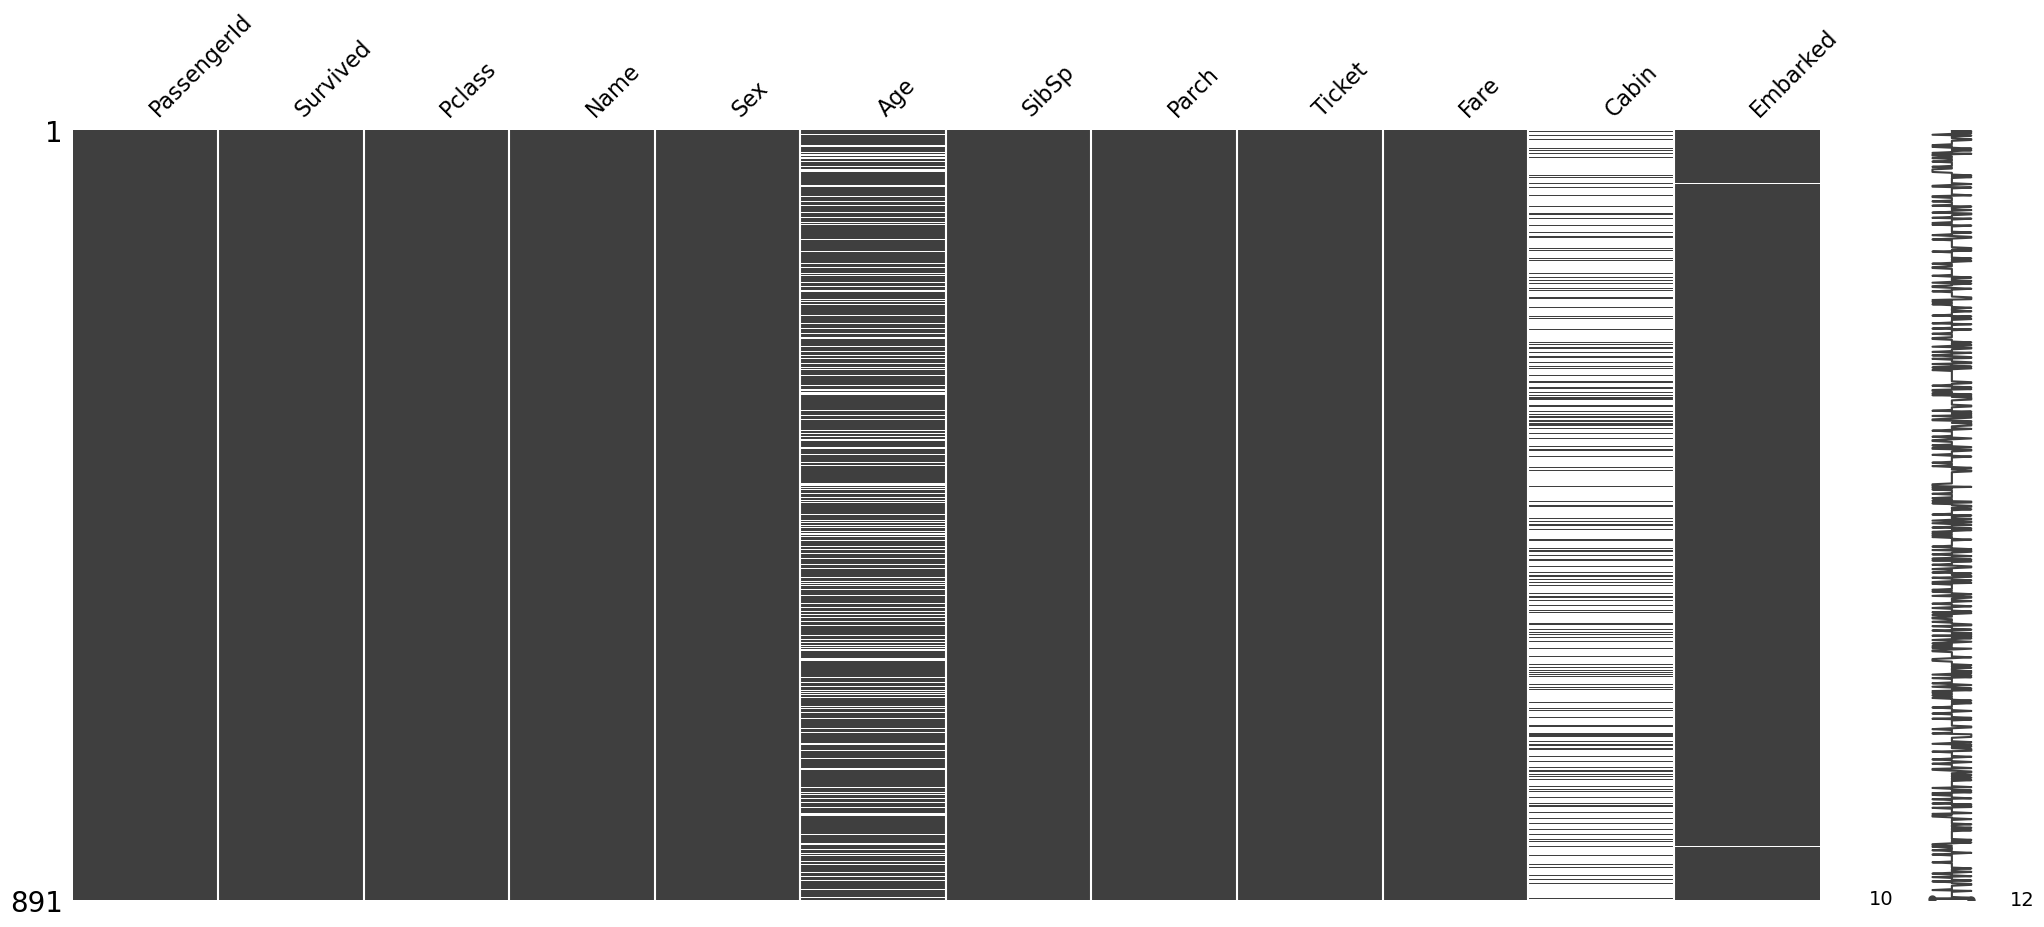

In [7]:
msno.matrix(df)
plt.show()

In [8]:
test = pd.read_csv('test.csv')

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [10]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
passid1= test['PassengerId']

In [13]:
train = pd.concat([df, test], axis=0).reset_index(drop=True)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [15]:
train[train.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### EDA

<Figure size 500x300 with 0 Axes>

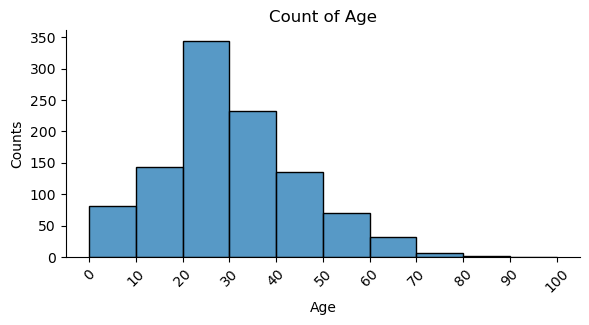

In [16]:
plt.figure(figsize=(5,3))
sns.displot(data=train, x="Age",bins=[0,10,20,30,40,50,60,70,80,90,100],height=3, aspect=2)
plt.title('Count of Age')
plt.xticks([0,10,20,30,40,50,60,70,80,90,100],rotation=45)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

In [17]:
train['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [18]:
#This takes each name (x), splits it by comma (,)
#takes the second part (index 1) of the split ([0] Braund, [1] Mr. Owen Harris), 
#splits it by period (.) [0] Mr, [1] Owen Harris), and strips any leading or trailing whitespace characters.
train['Title']= train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip()) 

In [19]:
train['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [20]:
pd.crosstab(train['Title'],train['Survived']).T

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1.0,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [21]:
train['Title'] = train['Title'].replace(['Ms', 'Mlle'], 'Miss')
train['Title'] = train['Title'].replace(['Mme'], 'Mrs')
train['Title'] = train['Title'].replace(['Capt','Col', 'Major','Dona','Don','Jonkheer'], 'Mr')
train['Title'] = train['Title'].replace(['Sir','Lady','the Countess','Dr', 'Rev'], 'Noble')

In [22]:
train['Title'].value_counts()

Title
Mr        767
Miss      264
Mrs       198
Master     61
Noble      19
Name: count, dtype: int64

In [23]:
train.groupby(['Title']).Age.mean()


Title
Master     5.482642
Miss      21.824366
Mr        32.552453
Mrs       36.918129
Noble     42.500000
Name: Age, dtype: float64

In [24]:
train["Age"].fillna(train.groupby(['Title'])['Age'].transform("mean"), inplace=True)

In [25]:
train.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
dtype: int64

In [26]:
# Creating a Categorical variable for Ages
# young = 0, adult = 1, prime =2, senior= 3
train['AgeGroup'] = ''
train['AgeGroup'].loc[(train['Age'] < 18)] = '1'
train['AgeGroup'].loc[(train['Age'] >= 18) & (train['Age'] < 40)] = '2'
train['AgeGroup'].loc[(train['Age'] >= 40) & (train['Age'] < 56)] = '3'
train['AgeGroup'].loc[(train['Age'] >= 56)] = '4'

In [27]:
train['AgeGroup']= train['AgeGroup'].astype(int)

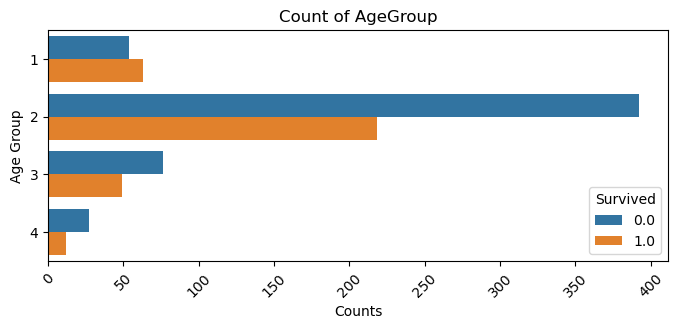

In [28]:
plt.figure(figsize=(8,3))
sns.countplot(data=train, y='AgeGroup', hue= 'Survived')
plt.title('Count of AgeGroup')
plt.xticks(rotation=45)
plt.ylabel('Age Group')
plt.xlabel('Counts')
plt.show()

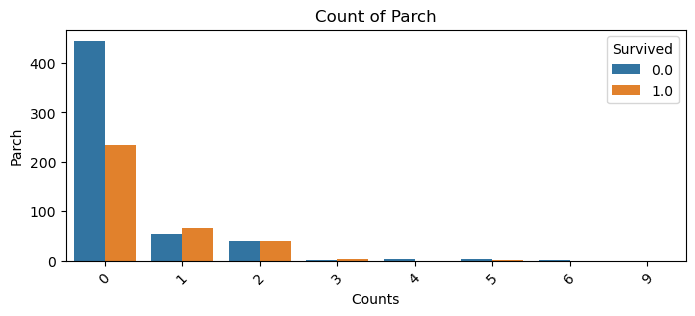

In [29]:
plt.figure(figsize=(8,3))
sns.countplot(data=train, x='Parch', hue= 'Survived')
plt.title('Count of Parch')
plt.xticks(rotation=45)
plt.ylabel('Parch')
plt.xlabel('Counts')
plt.show()

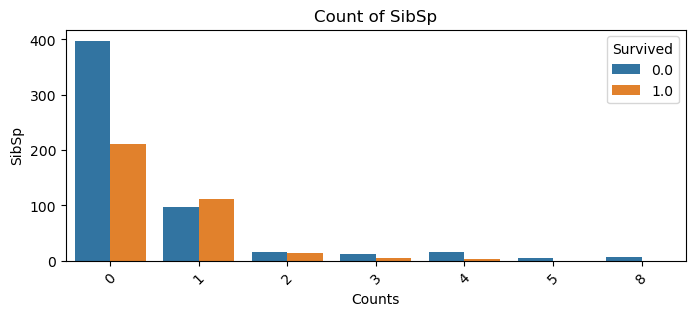

In [30]:
plt.figure(figsize=(8,3))
sns.countplot(data=train, x='SibSp', hue= 'Survived')
plt.title('Count of SibSp')
plt.xticks(rotation=45)
plt.ylabel('SibSp')
plt.xlabel('Counts')
plt.show()

<Figure size 500x300 with 0 Axes>

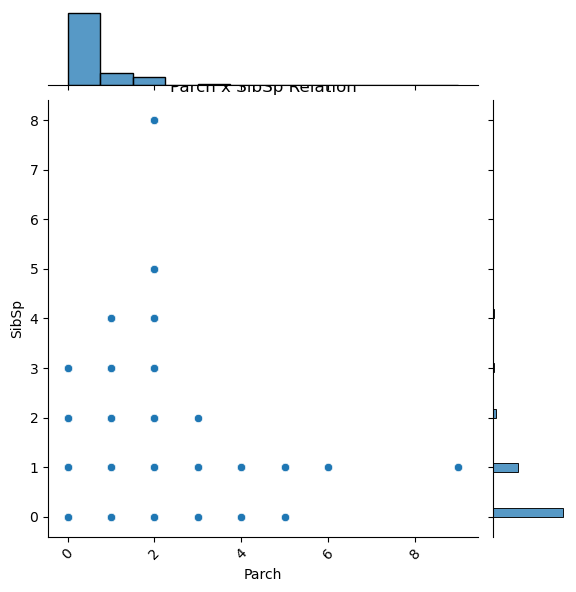

In [31]:
plt.figure(figsize=(5,3))
sns.jointplot(x='Parch',y='SibSp',data=train)
plt.title('Parch x SibSp Relation')
plt.xticks(rotation=45)
plt.ylabel('SibSp')
plt.xlabel('Parch')
plt.show()

In [32]:
train['FamilySize'] = train['Parch'] + train['SibSp'] + 1 # need plus else will have 0 family size so is consider yourself

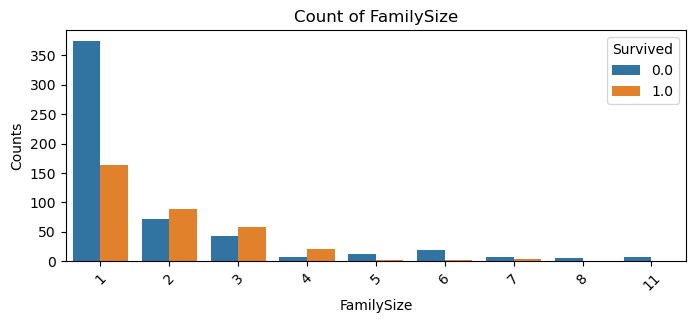

In [33]:
plt.figure(figsize=(8,3))
sns.countplot(data=train, x='FamilySize', hue= 'Survived')
plt.title('Count of FamilySize')
plt.xticks(rotation=45)
plt.xlabel('FamilySize')
plt.ylabel('Counts')
plt.show()

In [34]:
bins = [0, 1, 4, 6, np.inf] # 0 to 1: (1)alone, >1 to 4: (2)small, >4 to 6: (3)medium, >6 to infinity: (4)large
labels = ['1', '2', '3', '4']
train['FamilySizeGroup'] = pd.cut(train['FamilySize'], bins=bins, labels=labels).astype(int)

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,FamilySize,FamilySizeGroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,2,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,2,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,1,1


<Figure size 500x300 with 0 Axes>

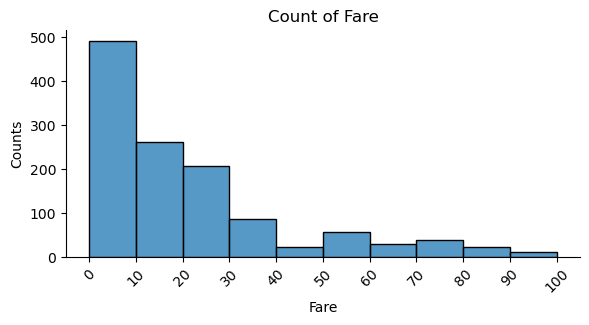

In [36]:
plt.figure(figsize=(5,3))
sns.displot(data=train, x="Fare",bins=[0,10,20,30,40,50,60,70,80,90,100],height=3, aspect=2)
plt.title('Count of Fare')
plt.xticks([0,10,20,30,40,50,60,70,80,90,100],rotation=45)
plt.xlabel('Fare')
plt.ylabel('Counts')
plt.show()

In [37]:
train['Fare']= train['Fare'].fillna(train['Fare'].mode().iloc[0])

In [38]:
train['FareBin'] = pd.qcut(train['Fare'], 5)

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
label = LabelEncoder()

train['FareBin'] = label.fit_transform(train['FareBin'])

In [41]:
pd.crosstab(train['FareBin'], train['Survived']).T

FareBin,0,1,2,3,4
Survived,,,,,
0.0,140,147,98,103,61
1.0,39,37,73,82,111


<Figure size 500x300 with 0 Axes>

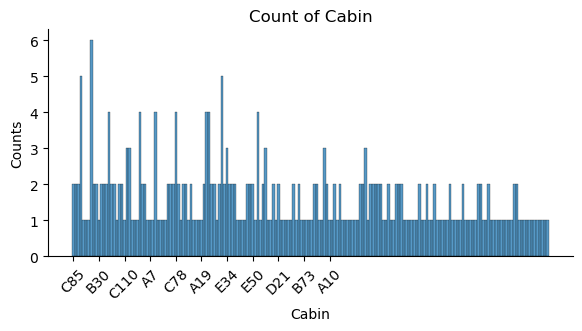

In [42]:
plt.figure(figsize=(5,3))
sns.displot(data=train, x="Cabin",bins=[0,10,20,30,40,50,60,70,80,90,100],height=3, aspect=2)
plt.title('Count of Cabin')
plt.xticks([0,10,20,30,40,50,60,70,80,90,100],rotation=45)
plt.xlabel('Cabin')
plt.ylabel('Counts')
plt.show()

In [43]:
train['Cabin_Deck']= train.Cabin.str[0]

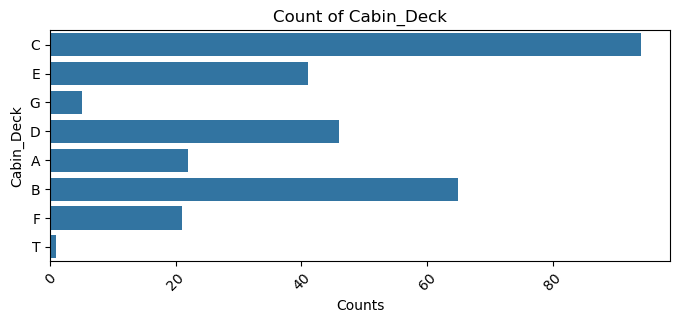

In [44]:
plt.figure(figsize=(8,3))
sns.countplot(data=train, y='Cabin_Deck')
plt.title('Count of Cabin_Deck')
plt.xticks(rotation=45)
plt.ylabel('Cabin_Deck')
plt.xlabel('Counts')
plt.show()

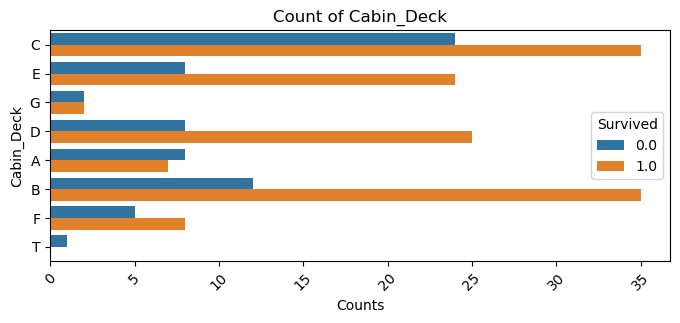

In [45]:
plt.figure(figsize=(8,3))
sns.countplot(data=train, y='Cabin_Deck', hue= 'Survived')
plt.title('Count of Cabin_Deck')
plt.xticks(rotation=45)
plt.ylabel('Cabin_Deck')
plt.xlabel('Counts')
plt.show()

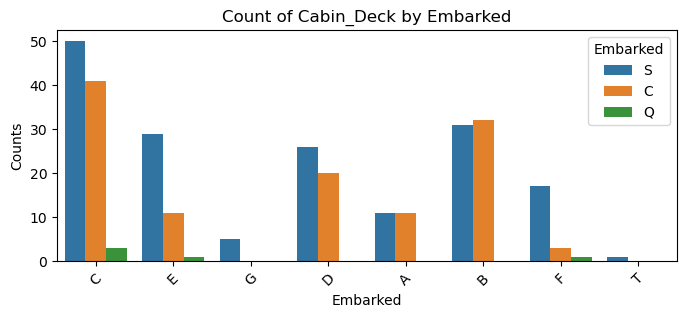

In [46]:
plt.figure(figsize=(8,3))
sns.countplot(data=train, x='Cabin_Deck', hue= 'Embarked')
plt.title('Count of Cabin_Deck by Embarked')
plt.xticks(rotation=45)
plt.xlabel('Embarked')
plt.ylabel('Counts')
plt.show()

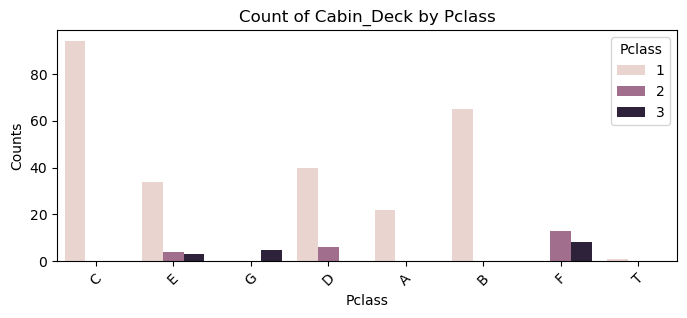

In [47]:
plt.figure(figsize=(8,3))
sns.countplot(data=train, x='Cabin_Deck', hue= 'Pclass')
plt.title('Count of Cabin_Deck by Pclass')
plt.xticks(rotation=45)
plt.xlabel('Pclass')
plt.ylabel('Counts')
plt.show()

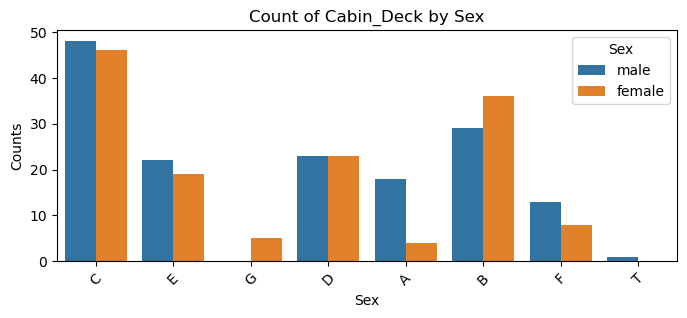

In [48]:
plt.figure(figsize=(8,3))
sns.countplot(data=train, x='Cabin_Deck', hue= 'Sex')
plt.title('Count of Cabin_Deck by Sex')
plt.xticks(rotation=45)
plt.xlabel('Sex')
plt.ylabel('Counts')
plt.show()

In [49]:
train['Surname']= train['Name'].str.split().str[0]

In [50]:
train.groupby(['Surname','Cabin_Deck'])['Cabin_Deck'].size().unstack().fillna(0)

Cabin_Deck,A,B,C,D,E,F,G,T
Surname,,,,,,,,
"Abelseth,",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"Allen,",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"Allison,",0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
"Anderson,",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
"Andrews,",1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
"Widener,",0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
"Williams-Lambert,",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
"Wilson,",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [51]:
surDeck= train.groupby(['Surname','Cabin_Deck'])['Cabin_Deck'].size().unstack().fillna(0)

In [52]:
# finding the rows with missing 'Cabin_Deck' values that have a matching 'Surname' in the surname DataFrame.
SurDeck_index= train[train['Cabin_Deck'].isna()][(train[train['Cabin_Deck'].isna()]['Surname']).isin(surDeck.index)].index

In [53]:
# Fill corresponding missing values
train.loc[SurDeck_index,'Cabin_Deck']=train.iloc[SurDeck_index,:]['Surname'].map(lambda x: surDeck.idxmax(axis=1)[x])

In [54]:
### Deck G from Pclass 3
train['Cabin_Deck'] = np.where((train['Pclass'] == 3) & (train['Cabin_Deck'].isna()), 'G', train['Cabin_Deck'])

In [55]:
### Deck G are Female
train['Cabin_Deck'] = np.where((train['Sex'] == 'female') & (train['Cabin_Deck'].isna()), 'G', train['Cabin_Deck'])

In [56]:
### Deck T are Male
train['Cabin_Deck'] = np.where((train['Sex'] == 'male') & (train['Cabin_Deck'].isna()), 'T', train['Cabin_Deck'])

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      1309 non-null   int64  
 1   Survived         891 non-null    float64
 2   Pclass           1309 non-null   int64  
 3   Name             1309 non-null   object 
 4   Sex              1309 non-null   object 
 5   Age              1309 non-null   float64
 6   SibSp            1309 non-null   int64  
 7   Parch            1309 non-null   int64  
 8   Ticket           1309 non-null   object 
 9   Fare             1309 non-null   float64
 10  Cabin            295 non-null    object 
 11  Embarked         1307 non-null   object 
 12  Title            1309 non-null   object 
 13  AgeGroup         1309 non-null   int32  
 14  FamilySize       1309 non-null   int64  
 15  FamilySizeGroup  1309 non-null   int32  
 16  FareBin          1309 non-null   int32  
 17  Cabin_Deck    

<Figure size 500x300 with 0 Axes>

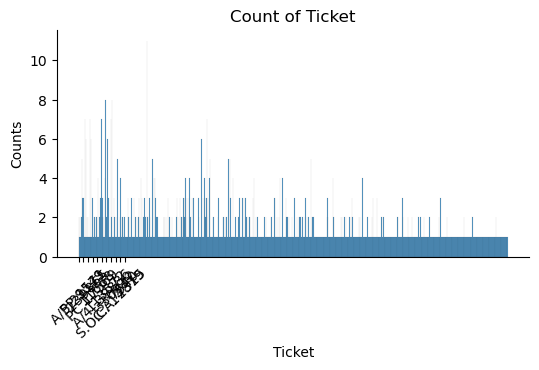

In [58]:
plt.figure(figsize=(5,3))
sns.displot(data=train, x="Ticket",bins=[0,10,20,30,40,50,60,70,80,90,100],height=3, aspect=2)
plt.title('Count of Ticket')
plt.xticks([0,10,20,30,40,50,60,70,80,90,100],rotation=45)
plt.xlabel('Ticket')
plt.ylabel('Counts')
plt.show()

In [59]:
train['Ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: Ticket, dtype: object

In [60]:
train['Ticket'].duplicated().sum()

380

In [61]:
# Find the duplicate ticket

duplicate_ticket = []
for tk in train['Ticket'].unique():
    same_ticket = train[train['Ticket'] == tk]['Ticket']
    if (same_ticket.count()>1):
        duplicate_ticket.append(train.loc[train['Ticket']==tk, ['Ticket','Surname', 'Fare', 'FamilySize', 'Survived']])

duplicate_ticket = pd.concat(duplicate_ticket)
duplicate_ticket.head(14)

,Ticket,Surname,Fare,FamilySize,Survived
1,PC 17599,"Cumings,",71.2833,2,1.0
1125,PC 17599,"Cumings,",71.2833,2,NaN
3,113803,"Futrelle,",53.1000,2,1.0
137,113803,"Futrelle,",53.1000,2,0.0
6,17463,"McCarthy,",51.8625,1,0.0
1037,17463,"Hilliard,",51.8625,1,NaN
7,349909,"Palsson,",21.0750,5,0.0
24,349909,"Palsson,",21.0750,5,0.0
374,349909,"Palsson,",21.0750,5,0.0
567,349909,"Palsson,",21.0750,5,0.0


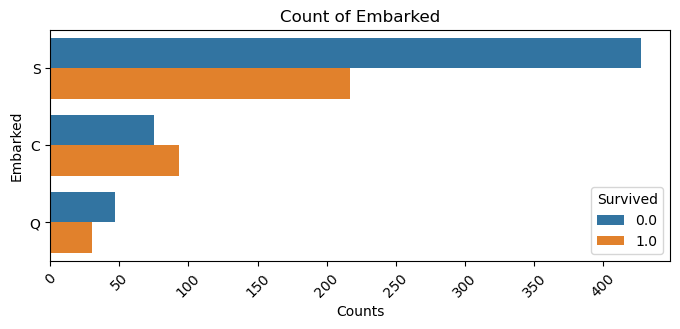

In [62]:
plt.figure(figsize=(8,3))
sns.countplot(data=train, y='Embarked', hue= 'Survived')
plt.title('Count of Embarked')
plt.xticks(rotation=45)
plt.ylabel('Embarked')
plt.xlabel('Counts')
plt.show()

In [63]:
train['Embarked']= train['Embarked'].fillna(train['Embarked'].mode().iloc[0])

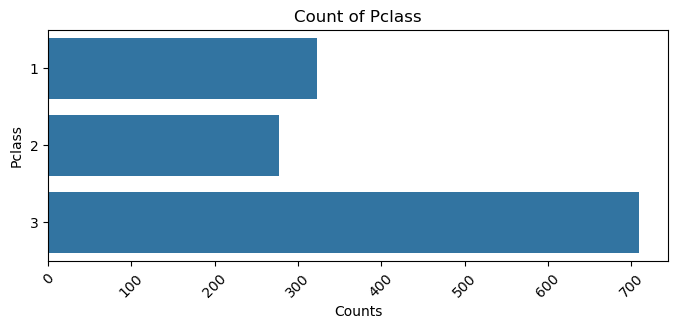

In [64]:
plt.figure(figsize=(8,3))
sns.countplot(data=train, y='Pclass')
plt.title('Count of Pclass')
plt.xticks(rotation=45)
plt.ylabel('Pclass')
plt.xlabel('Counts')
plt.show()

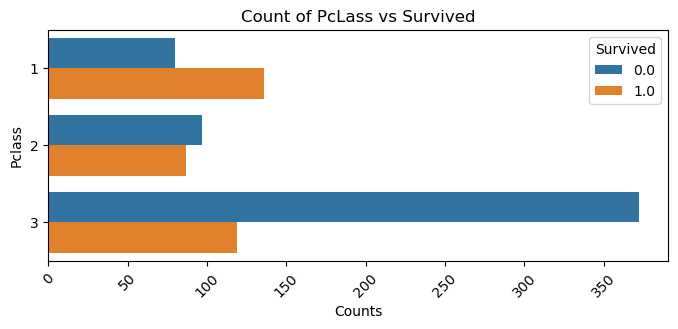

In [65]:
plt.figure(figsize=(8,3))
sns.countplot(data=train, y='Pclass', hue= 'Survived')
plt.title('Count of PcLass vs Survived')
plt.xticks(rotation=45)
plt.ylabel('Pclass')
plt.xlabel('Counts')
plt.show()

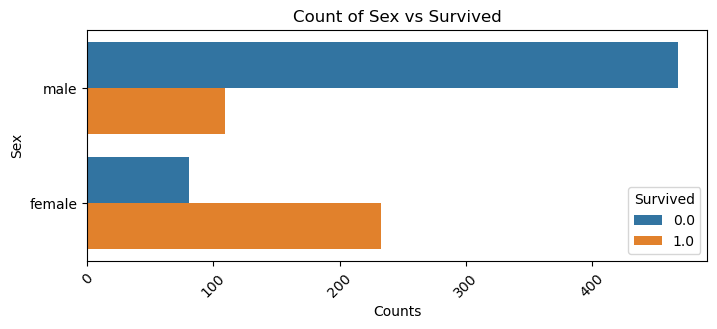

In [66]:
plt.figure(figsize=(8,3))
sns.countplot(data=train, y='Sex', hue= 'Survived')
plt.title('Count of Sex vs Survived')
plt.xticks(rotation=45)
plt.ylabel('Sex')
plt.xlabel('Counts')
plt.show() #female have higher surivial

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      1309 non-null   int64  
 1   Survived         891 non-null    float64
 2   Pclass           1309 non-null   int64  
 3   Name             1309 non-null   object 
 4   Sex              1309 non-null   object 
 5   Age              1309 non-null   float64
 6   SibSp            1309 non-null   int64  
 7   Parch            1309 non-null   int64  
 8   Ticket           1309 non-null   object 
 9   Fare             1309 non-null   float64
 10  Cabin            295 non-null    object 
 11  Embarked         1309 non-null   object 
 12  Title            1309 non-null   object 
 13  AgeGroup         1309 non-null   int32  
 14  FamilySize       1309 non-null   int64  
 15  FamilySizeGroup  1309 non-null   int32  
 16  FareBin          1309 non-null   int32  
 17  Cabin_Deck    

In [68]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,FamilySize,FamilySizeGroup,FareBin,Cabin_Deck,Surname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,2,2,0,G,"Braund,"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,2,2,4,C,"Cumings,"
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2,1,1,1,G,"Heikkinen,"
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2,4,C,"Futrelle,"
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,1,1,1,B,"Allen,"


In [69]:
train= pd.get_dummies(data=train,columns=['Sex', 'Cabin_Deck', 'Embarked'])

In [70]:
train.drop({'Cabin','PassengerId','Name','Surname','Ticket', 
            'Title', 'Age', 'Fare', 'Parch', 'SibSp', 'FamilySize'},axis=1, inplace=True)

In [71]:
train.head()

,Survived,Pclass,AgeGroup,FamilySizeGroup,FareBin,Sex_female,Sex_male,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,2,2,0,False,True,False,False,False,False,False,False,True,False,False,False,True
1,1.0,1,2,2,4,True,False,False,False,True,False,False,False,False,False,True,False,False
2,1.0,3,2,1,1,True,False,False,False,False,False,False,False,True,False,False,False,True
3,1.0,1,2,2,4,True,False,False,False,True,False,False,False,False,False,False,False,True
4,0.0,3,2,1,1,False,True,False,True,False,False,False,False,False,False,False,False,True


In [72]:
test = train[train['Survived'].isna()] # test data cleaned, revert to normal shape 418,18 

In [73]:
test= test.drop('Survived', axis=1)

In [74]:
train = train.dropna(subset=['Survived']) # train data, revert to normal shape 891, 19

In [75]:
train['Survived']= train['Survived'].astype(int)

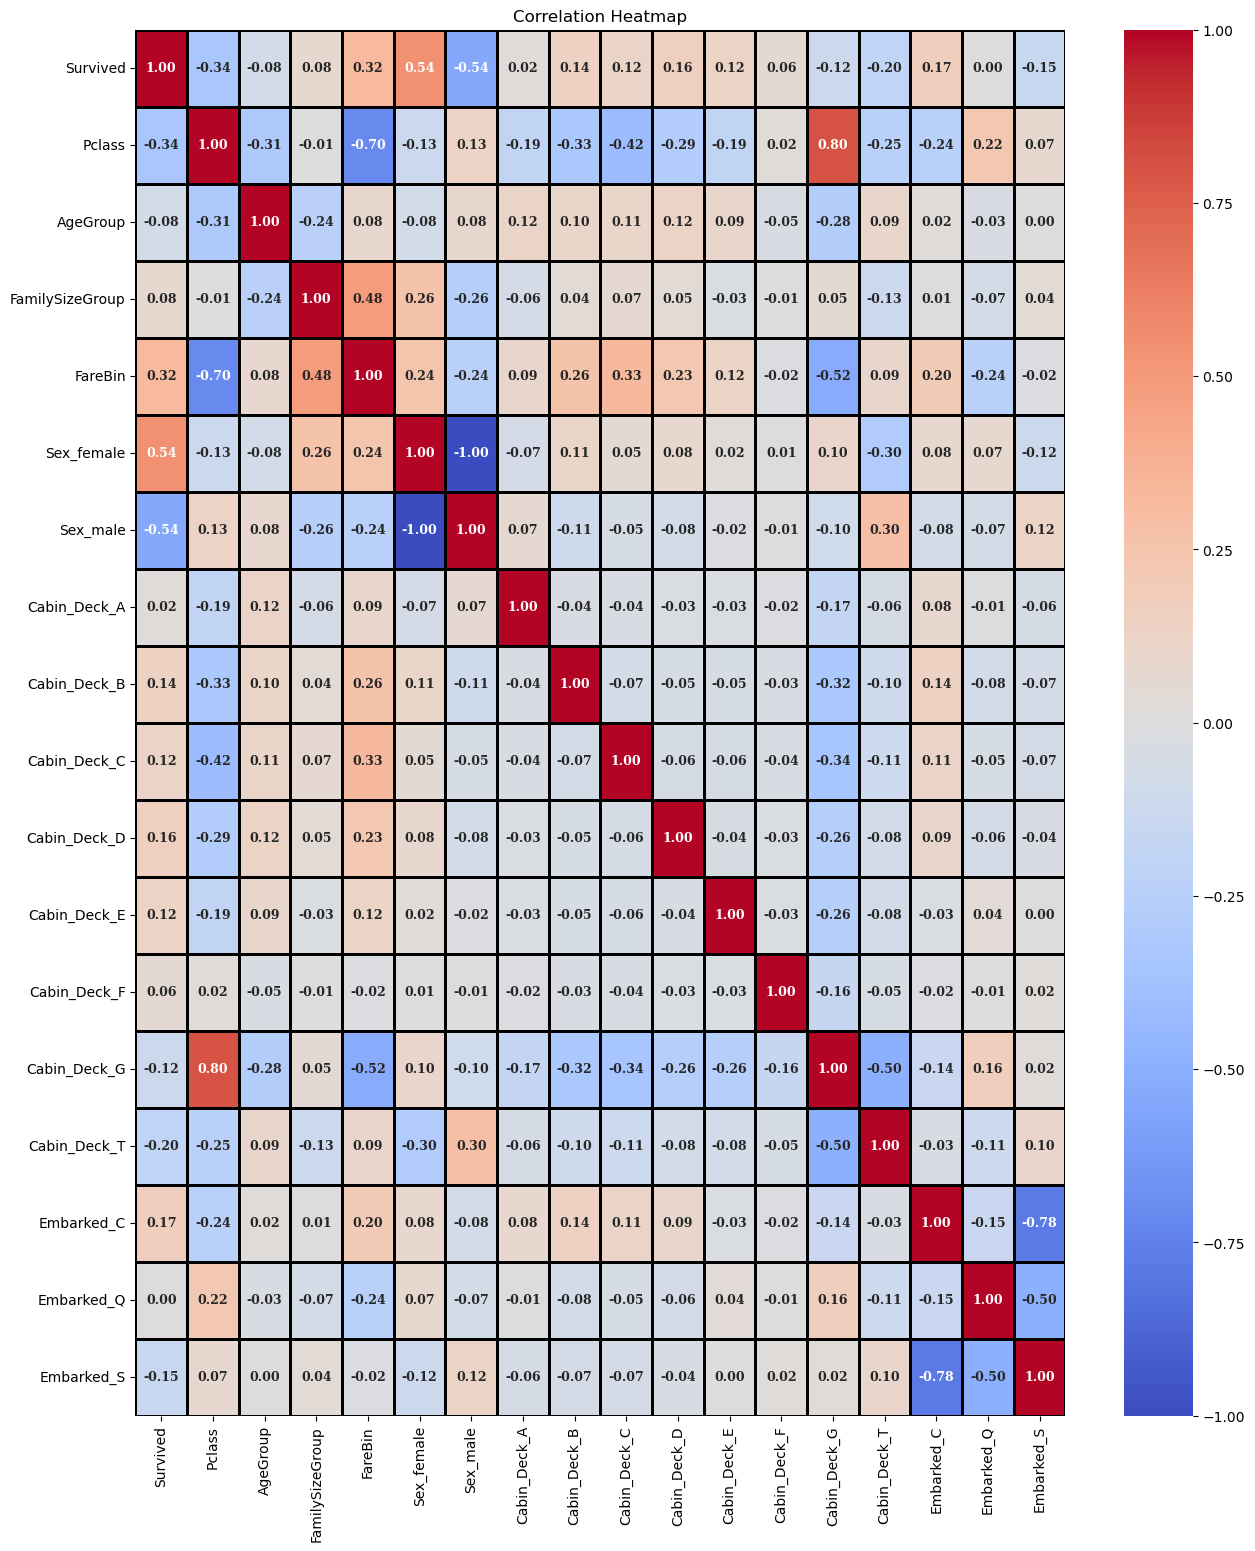

In [76]:
plt.figure(figsize=(15,18))
sns.heatmap(train.corr(),cmap='coolwarm',vmin=-1,vmax=1,annot=True,
            fmt='0.2f',annot_kws={"fontsize":9,"fontweight":"bold","fontfamily":"serif"},linewidth=1,linecolor="black")
plt.xticks(rotation=90)
plt.title('Correlation Heatmap')
plt.show()

### Model development

In [77]:
y = train['Survived']

In [78]:
train.columns

Index(['Survived', 'Pclass', 'AgeGroup', 'FamilySizeGroup', 'FareBin',
       'Sex_female', 'Sex_male', 'Cabin_Deck_A', 'Cabin_Deck_B',
       'Cabin_Deck_C', 'Cabin_Deck_D', 'Cabin_Deck_E', 'Cabin_Deck_F',
       'Cabin_Deck_G', 'Cabin_Deck_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [79]:
# select columns for model training
col = ['AgeGroup', 'FamilySizeGroup', 'FareBin',
       'Sex_female', 'Cabin_Deck_D',
       'Embarked_C'     
              ]

In [80]:
X =train[col]

In [81]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=14)

In [82]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### ANN

In [83]:
ann_grid = MLPClassifier(max_iter=1500)
ann_param = {
    'hidden_layer_sizes': [(8), (24)],
    'alpha': np.logspace(-4, 0, 5),
    #'activation': ['relu', 'tanh', 'logistic'],
    #'learning_rate_init': [0.01, 0.1, 1],
    #'batch_size': [16, 32, 64],
    #'solver': ['adam', 'sgd'],
    'random_state': [14]
}
ann_model = GridSearchCV(ann_grid,ann_param, cv=5,scoring='accuracy')
ann_model.fit(X_train,y_train)

print("Best Estimator for Artificial Neural Network using Grid Search :", ann_model.best_estimator_)
print("Best Parameters for Artificial Neural Network using Grid Search :", ann_model.best_params_)
print("Best Score for Artificial Neural Network using Grid Search :", ann_model.best_score_)

pred_ann = ann_model.predict(X_test)
print(classification_report(y_test, pred_ann))

Best Estimator for Artificial Neural Network using Grid Search : MLPClassifier(alpha=0.1, hidden_layer_sizes=8, max_iter=1500, random_state=14)
Best Parameters for Artificial Neural Network using Grid Search : {'alpha': 0.1, 'hidden_layer_sizes': 8, 'random_state': 14}
Best Score for Artificial Neural Network using Grid Search : 0.8117797695262483
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       115
           1       0.70      0.72      0.71        64

    accuracy                           0.79       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



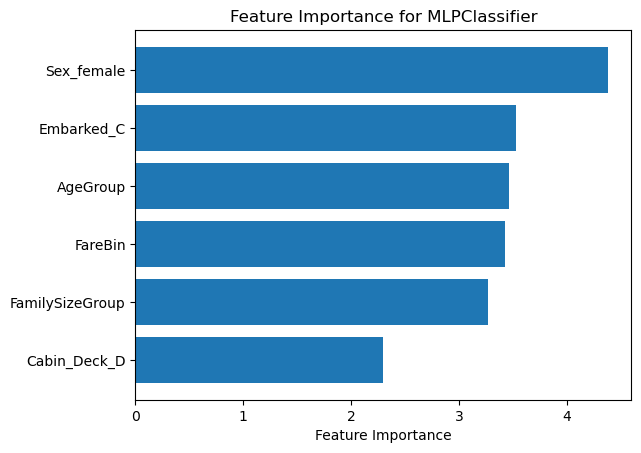

In [84]:
best_mlp_model = ann_model.best_estimator_
# Get weights connecting input layer to the first hidden layer
weights = best_mlp_model.coefs_[0]
# Calculate feature importances
feature_importances = np.abs(weights).sum(axis=1)
# Get feature names
feature_names = X.columns
# Sort features by importance
sorted_idx = feature_importances.argsort()

# Plot feature importances
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for MLPClassifier')
plt.show()

### DT

In [85]:
# DT was selected out of the four models as it provide the best accuracy
dt_grid = DecisionTreeClassifier()
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15], 
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [14]
}
dt_grid_model = GridSearchCV(dt_grid,dt_params, cv = 5, scoring='accuracy')

dt_grid_model.fit(X_train,y_train)

print("Best Parameters for Decision Tree Classifier using Grid Search :", dt_grid_model.best_params_)
print("Best Score for Decision Tree Classifier using Grid Search :", dt_grid_model.best_score_)

pred_dt = dt_grid_model.predict(X_test)
print(classification_report(y_test, pred_dt))

Best Parameters for Decision Tree Classifier using Grid Search : {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 14}
Best Score for Decision Tree Classifier using Grid Search : 0.8272136314389836
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       115
           1       0.79      0.70      0.74        64

    accuracy                           0.83       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.83      0.82       179



### SVC

In [86]:
svc_grid = SVC()

svc_param = {
    'C': [0.1, 1, 10, 100],
    #'kernel': ['poly', 'rbf', 'sigmoid'],
    #'gamma': [0.1, 1, 'scale', 'auto'],
    #'degree': [2, 3, 4],
    #'class_weight': [None, 'balanced'],
    'random_state': [14]
    }
svc_model = GridSearchCV(svc_grid, svc_param, cv=5, scoring = 'accuracy')

svc_model.fit(X_train, y_train)

print("Best Estimator for Support Vector Classifier using Grid Search :", svc_model.best_estimator_)
print("Best Parameters for Support Vector Classifier using Grid Search :", svc_model.best_params_)
print("Best Score for Support Vector Classifier using Grid Search :", svc_model.best_score_)

pred_svc = svc_model.predict(X_test)
print(classification_report(y_test, pred_svc))

Best Estimator for Support Vector Classifier using Grid Search : SVC(C=1, random_state=14)
Best Parameters for Support Vector Classifier using Grid Search : {'C': 1, 'random_state': 14}
Best Score for Support Vector Classifier using Grid Search : 0.8243967300305328
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       115
           1       0.72      0.73      0.73        64

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



### RF

In [87]:
# ANN was selected out of the four models as it provide the best accuracy
rf_grid = RandomForestClassifier()
rf_params = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [0, 50, 100, 150],
    'max_depth': [None, 5, 10],
    #'min_samples_split': [2, 4, 6],
    #'min_samples_leaf': [2, 4],
    #'max_features': ['sqrt', None],
    #'oob_score': [True],
    'random_state': [14]
            
}

rf_grid_model = GridSearchCV(rf_grid,rf_params, cv=5, scoring='roc_auc', n_jobs = -1)

rf_grid_model.fit(X_train,y_train)

print("Best Estimator for Random Forest Classifier using Grid Search :", rf_grid_model.best_estimator_)
print("Best Parameters for Random Forest Classifier using Grid Search :", rf_grid_model.best_params_)
print("Best Score for Random Forest Classifier using Grid Search :", rf_grid_model.best_score_)

pred_rf = rf_grid_model.predict(X_test)
print(classification_report(y_test,pred_rf))

Best Estimator for Random Forest Classifier using Grid Search : RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=150,
                       random_state=14)
Best Parameters for Random Forest Classifier using Grid Search : {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 150, 'random_state': 14}
Best Score for Random Forest Classifier using Grid Search : 0.8509524069888947
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       115
           1       0.75      0.72      0.74        64

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179



Text(0.5, 1.0, 'Feature Importances')

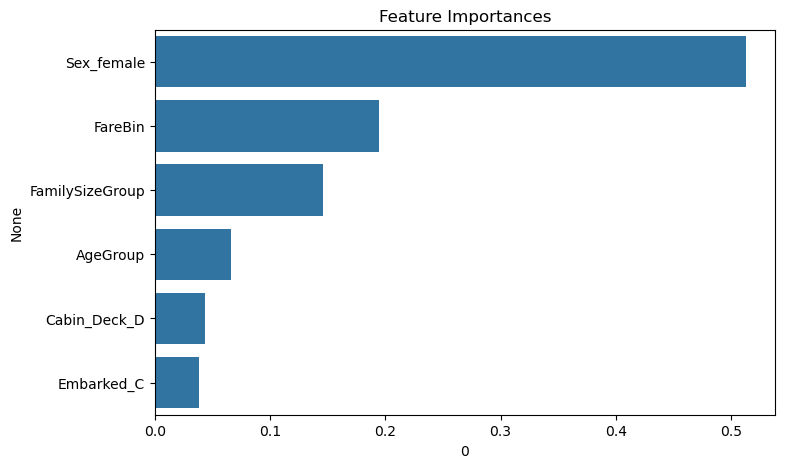

In [88]:
# Feature Importances
best_model = rf_grid_model.best_estimator_
importances = pd.DataFrame(best_model.feature_importances_,index = X.columns)
importances.sort_values(by = 0, inplace=True, ascending = False)

plt.figure(figsize=(8, 5)) 
sns.barplot(x=0, y=importances.index, data=importances).set_title('Feature Importances')

### KNC

In [89]:
knc_grid = KNeighborsClassifier()

knc_params = {
    'n_neighbors': [3, 7, 11, 15, 19, 24],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
}
knc_grid_model = GridSearchCV(knc_grid, knc_params, cv=5, scoring='accuracy')

knc_grid_model.fit(X_train, y_train)

print("Best Parameters for KNeighborsClassifier using Grid Search:", knc_grid_model.best_params_)
print("Best Score for KNeighborsClassifier using Grid Search:", knc_grid_model.best_score_)

pred_knc = knc_grid_model.predict(X_test)
print(classification_report(y_test, pred_knc))

Best Parameters for KNeighborsClassifier using Grid Search: {'algorithm': 'ball_tree', 'n_neighbors': 15, 'weights': 'uniform'}
Best Score for KNeighborsClassifier using Grid Search: 0.8117600709150004
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       115
           1       0.74      0.78      0.76        64

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [90]:
# select columns for model prediction
test1 = test[col]

In [114]:
pred_rf = rf_grid_model.predict(test1) #pred_rf = rf_grid_model.predict(test1) #pred_knc = knc_grid_model.predict(test1) 

### Result

In [115]:
result = pd.DataFrame({'PassengerId': passid1, 'Survived': pred_rf}) #RF=0.77511, KNC=0.74401, ANN=0.67703, DT=0.72009, SVC=0.68421

In [116]:
result.groupby('Survived').size()

Survived
0    276
1    142
dtype: int64

In [117]:
result.to_csv('SurviveRF.csv', index=False)